In [8]:
import numpy as np
import pandas as pd

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

from ast import literal_eval

import warnings
warnings.filterwarnings("ignore")

## Features João

### Divisão aleatória


# Dataset: Original
----------------------------------------
Performance Metrics (Treino 80% -> Teste 20%):
Accuracy - Teste: 0.4364
F1-Score - Teste: 0.4246
----------------------------------------


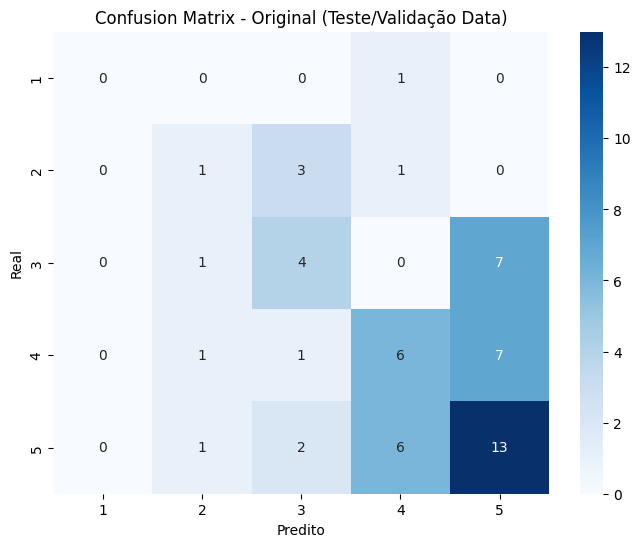

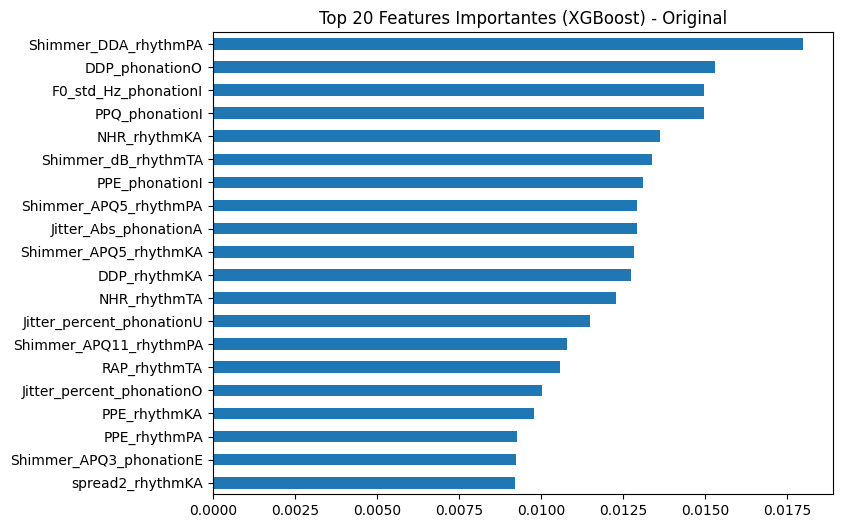


# Dataset: Z-Score
----------------------------------------
Performance Metrics (Treino 80% -> Teste 20%):
Accuracy - Teste: 0.4364
F1-Score - Teste: 0.4246
----------------------------------------


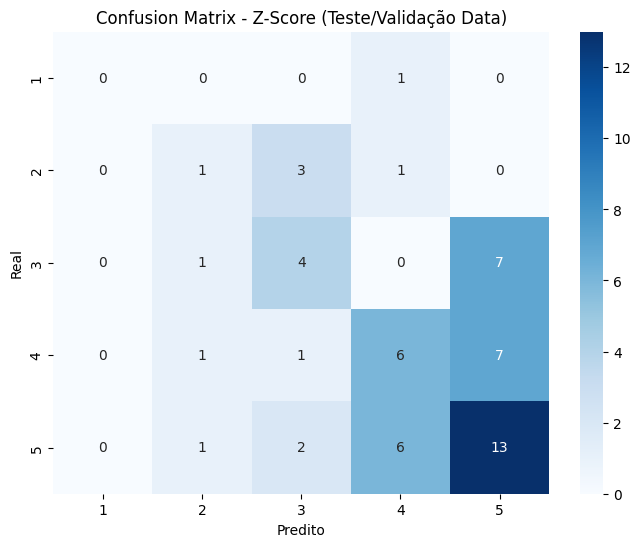

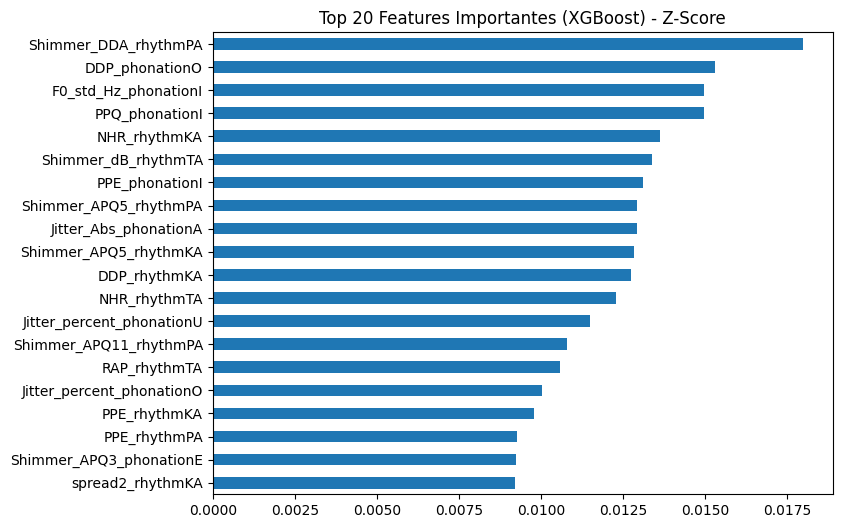


# Dataset: Min-Max
----------------------------------------
Performance Metrics (Treino 80% -> Teste 20%):
Accuracy - Teste: 0.4364
F1-Score - Teste: 0.4246
----------------------------------------


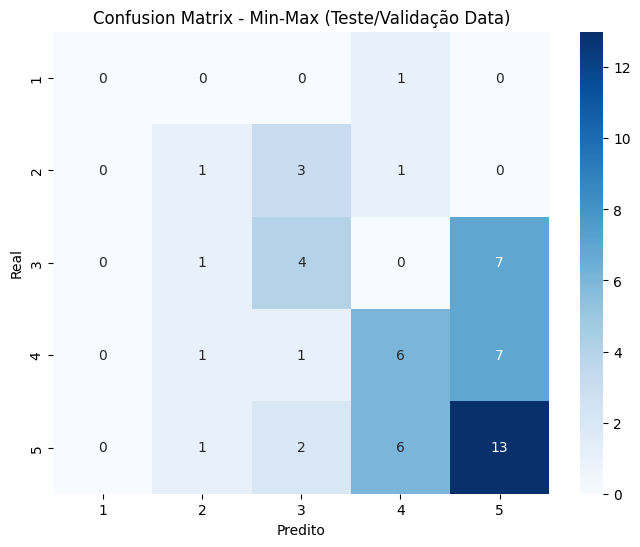

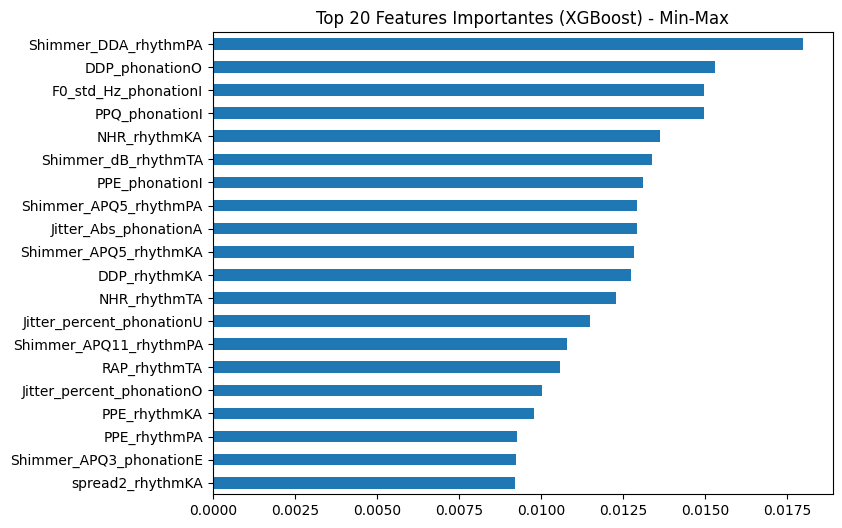


# Dataset: SN Min-Max
----------------------------------------
Performance Metrics (Treino 80% -> Teste 20%):
Accuracy - Teste: 0.4364
F1-Score - Teste: 0.4246
----------------------------------------


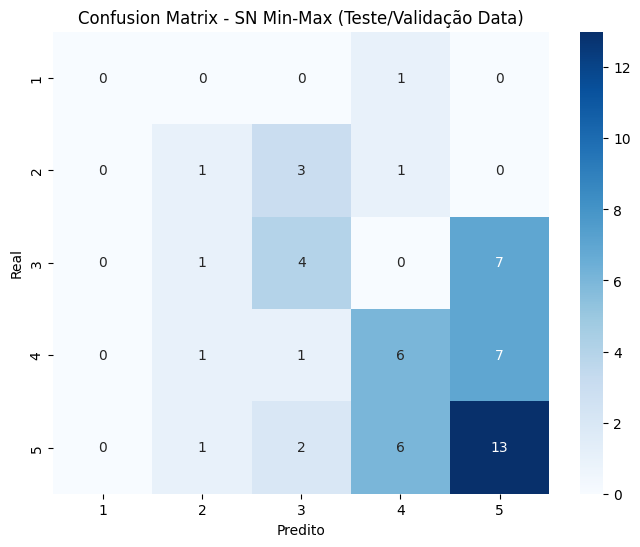

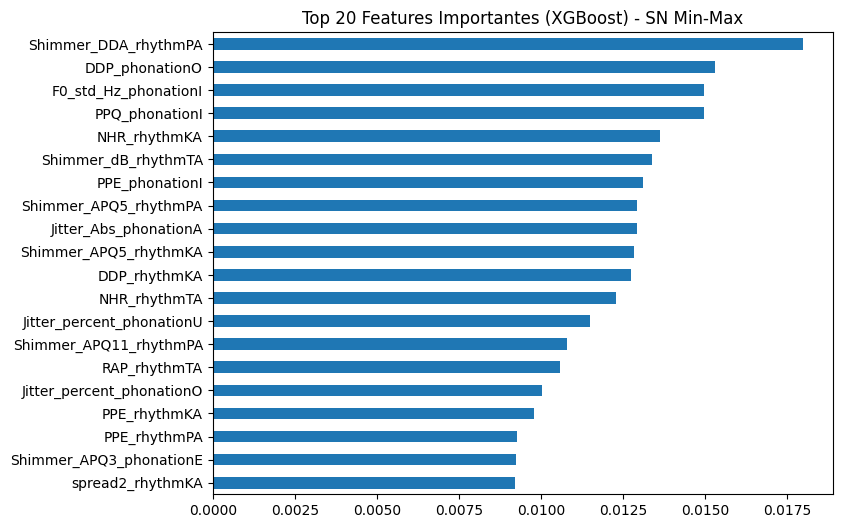


# Dataset: SN Z-Score
----------------------------------------
Performance Metrics (Treino 80% -> Teste 20%):
Accuracy - Teste: 0.4364
F1-Score - Teste: 0.4246
----------------------------------------


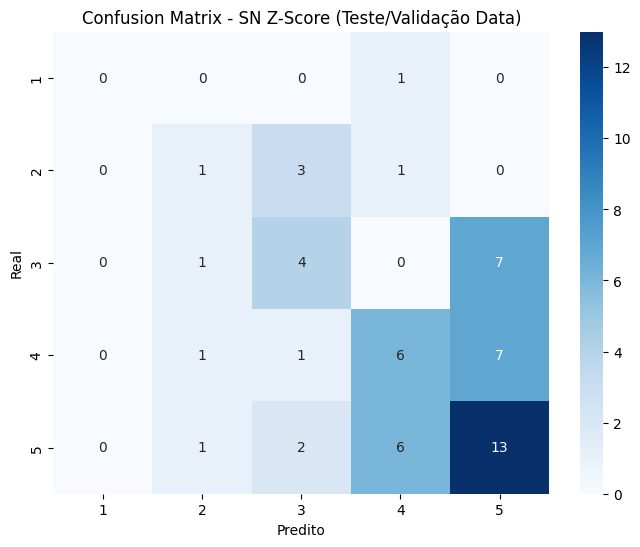

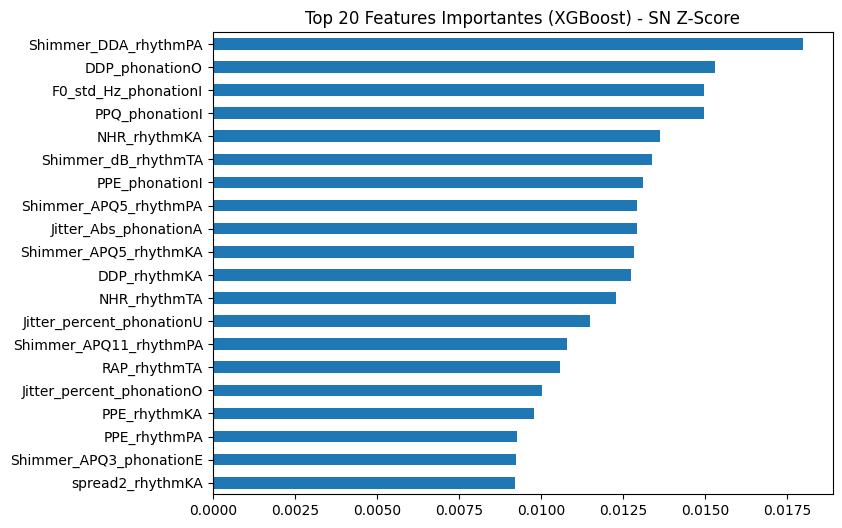

In [9]:
train_file_paths = {
    'Original': r'..\data\task1\features\train\features_raw.csv',
    'Z-Score': r'..\data\task1\features\train\features_z_score.csv',
    'Min-Max': r'..\data\task1\features\train\features_min_max_0_1.csv',
    'SN Min-Max': r'..\data\task1\features\train\features_signal_norm_-1_1_min_max_0_1.csv',
    'SN Z-Score': r'..\data\task1\features\train\features_signal_norm_-1_1_z_score.csv',
}

xgb_params = {
    'n_estimators': 200,
    'max_depth': 7,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'multi:softmax',
    'eval_metric': 'mlogloss',
    'use_label_encoder': False,
    'random_state': 42,
    'n_jobs': -1
}

TEST_SIZE_PERCENTAGE = 0.2 
META_COLUMNS = ['ID', 'Class']
results = []

for name, train_path in train_file_paths.items():
    print(f'\n# Dataset: {name}')
    
    try:
        df_train_full = pd.read_csv(train_path)
    except FileNotFoundError as e:
        print(f'ERRO: {e}')
        continue

    df_train_full['Sex'] = df_train_full['Sex'].map({'M': 0, 'F': 1})
    
    X_full_orig = df_train_full.drop(columns=META_COLUMNS)
    y_full = df_train_full['Class']
    
    y_full_encoded = y_full - 1

    X_train_orig, X_test_orig, y_train_encoded, y_test_encoded = train_test_split(
        X_full_orig, y_full_encoded, test_size=TEST_SIZE_PERCENTAGE, stratify=y_full_encoded, random_state=42
    )
    
    if 'Original' in name:
        scaler = StandardScaler()
        X_train_processed = scaler.fit_transform(X_train_orig)
        X_test_processed = scaler.transform(X_test_orig)
    else:
        X_train_processed = X_train_orig.values
        X_test_processed = X_test_orig.values

    num_classes = len(y_full.unique())
    xgb_params['num_class'] = num_classes

    xgb_model = xgb.XGBClassifier(**xgb_params)
    xgb_model.fit(X_train_processed, y_train_encoded)
    
    y_test_pred_encoded = xgb_model.predict(X_test_processed)
    y_test = y_test_encoded + 1
    y_test_pred = y_test_pred_encoded + 1
    
    acc_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    print('-' * 40)
    print('Performance Metrics (Treino 80% -> Teste 20%):')
    print(f'Accuracy - Teste: {acc_test:.4f}')
    print(f'F1-Score - Teste: {f1_test:.4f}')
    print('-' * 40)
    
    results.append({
        'Dataset': name,
        'Accuracy': acc_test,
        'F1-Score': f1_test
    })

    cm = confusion_matrix(y_test, y_test_pred)
    labels = sorted(y_full.unique()) 
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title(f'Confusion Matrix - {name} (Teste/Validação Data)')
    plt.show()

    importances = pd.Series(xgb_model.feature_importances_, index=X_train_orig.columns)
    plt.figure(figsize=(8, 6))
    importances.nlargest(20).sort_values().plot(kind='barh')
    plt.title(f'Top 20 Features Importantes (XGBoost) - {name}')
    plt.show()

### IDs do Baseline

## Features Thiago

### Divisão aleatória

### IDs do Baseline


# Carregando dataset...
Convertendo coluna com arrays: counts_rhythmKA
Convertendo coluna com arrays: counts_rhythmPA
Convertendo coluna com arrays: counts_rhythmTA
Convertendo coluna com arrays: peaks_rhythmKA
Convertendo coluna com arrays: peaks_rhythmPA
Convertendo coluna com arrays: peaks_rhythmTA


c:\Users\joaov_zm1q2wh\python\icassp_challenge\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\joaov_zm1q2wh\python\icassp_challenge\.venv\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\joaov_zm1q2wh\python\icassp_challenge\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\joaov_zm1q2wh\python\icassp_challenge\.venv\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\joaov_zm1q2wh\python\icassp_challenge\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\joaov_zm1q2wh\python\ic

Total treino: 219 | teste: 53
----------------------------------------
Modelo: XGBoost Classifier (Multiclasse)
Accuracy - Teste: 0.5094
F1-Score - Teste: 0.5034
----------------------------------------


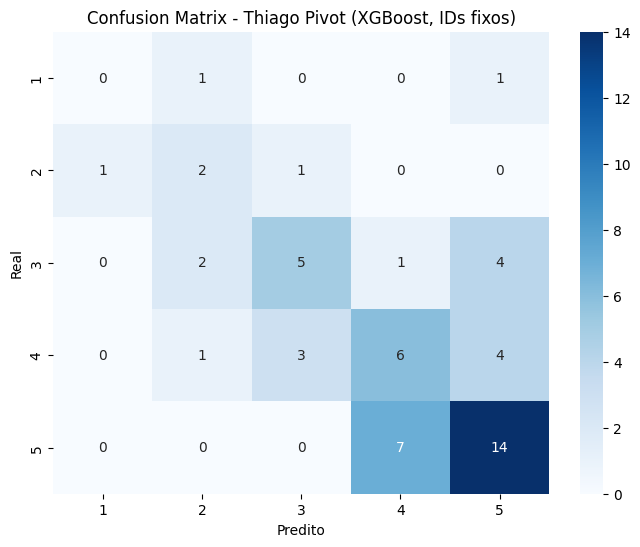

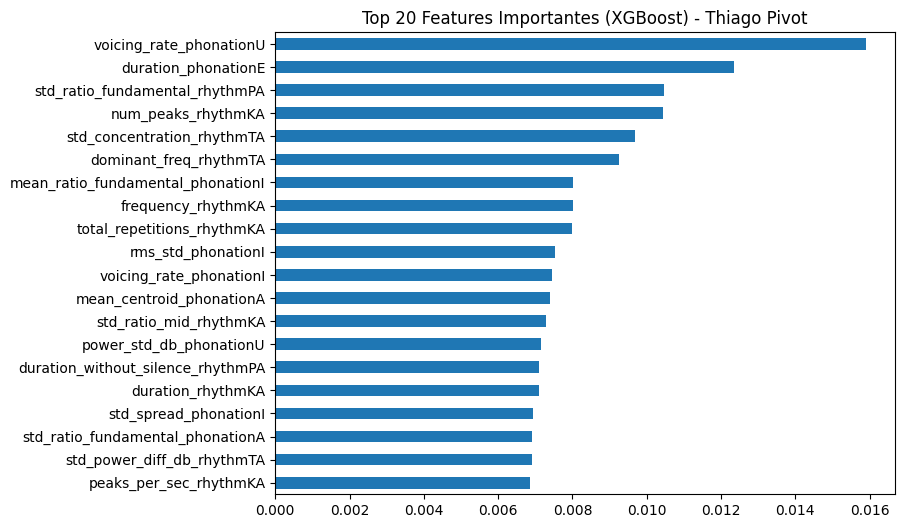

In [7]:
test_ids = [
    "ID007","ID012","ID021","ID029","ID037","ID046","ID051","ID053","ID054","ID056",
    "ID063","ID075","ID083","ID090","ID099","ID101","ID105","ID110","ID116","ID122",
    "ID129","ID136","ID138","ID140","ID158","ID160","ID164","ID171","ID176","ID179",
    "ID202","ID209","ID227","ID229","ID233","ID245","ID252","ID253","ID260","ID261",
    "ID263","ID264","ID269","ID270","ID274","ID278","ID284","ID286","ID290","ID302",
    "ID306","ID323","ID329"
]

train_file_path = r'C:\Users\joaov_zm1q2wh\python\icassp_challenge\data\task1\features\train\features_thiago_pivot.csv'

# Parâmetros para o XGBoost Classifier (ajustado para multiclasse)
xgb_params = {
    'n_estimators': 200,
    'max_depth': 7,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'multi:softmax', # Alterado para multiclasse
    'eval_metric': 'mlogloss',     # Métrica para multiclasse
    'use_label_encoder': False,
    'random_state': 42,
    'n_jobs': -1
}

META_COLUMNS = ['ID', 'Class']

print(f'\n# Carregando dataset...')
df = pd.read_csv(train_file_path)

if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})

df = df.dropna(axis=1, how='all')

def try_parse_array(x):
    try:
        val = literal_eval(x) if isinstance(x, str) and x.startswith('[') else x
        if isinstance(val, (list, tuple, np.ndarray)):
            return np.mean(val)
        return val
    except Exception:
        return x

for col in df.columns:
    if df[col].astype(str).str.startswith('[').any():
        print(f'Convertendo coluna com arrays: {col}')
        df[col] = df[col].apply(try_parse_array)

df['ID'] = df['ID'].astype(str)

# Separação dos datasets de treino e teste baseada nos IDs fixos
df_test = df[df['ID'].isin(test_ids)].copy()
df_train = df[~df['ID'].isin(test_ids)].copy()

print(f"Total treino: {len(df_train)} | teste: {len(df_test)}")

# Separando features originais
X_train_orig = df_train.drop(columns=META_COLUMNS)
y_train = df_train['Class'] # Classes originais (1 a 5)

X_test_orig = df_test.drop(columns=META_COLUMNS)
y_test = df_test['Class'] # Classes originais (1 a 5)

# Seleção e alinhamento de colunas numéricas
X_train_orig = X_train_orig.select_dtypes(include=[np.number])
X_test_orig = X_test_orig[X_train_orig.columns]

# Pré-processamento StandardScaler
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train_orig)
X_test_processed = scaler.transform(X_test_orig)

# ENCODING DO TARGET: XGBoost requer rótulos a partir de 0 para multiclasse
y_train_encoded = y_train - 1
y_test_encoded = y_test - 1

# Determinar o número de classes para o XGBoost
num_classes = len(y_train.unique())
xgb_params['num_class'] = num_classes

# Treinamento do XGBoost
xgb_model = xgb.XGBClassifier(**xgb_params)
xgb_model.fit(X_train_processed, y_train_encoded)

# Predição (retorna os rótulos codificados)
y_test_pred_encoded = xgb_model.predict(X_test_processed)

# DECODING DO TARGET: Converter de volta para os rótulos originais (1 a 5) para avaliação
y_test_pred = y_test_pred_encoded + 1

# Avaliação do Desempenho
acc_test = accuracy_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred, average='weighted')

print('-' * 40)
print('Modelo: XGBoost Classifier (Multiclasse)')
print(f'Accuracy - Teste: {acc_test:.4f}')
print(f'F1-Score - Teste: {f1_test:.4f}')
print('-' * 40)

# Matriz de Confusão
cm = confusion_matrix(y_test, y_test_pred)
labels = sorted(y_test.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title(f'Confusion Matrix - Thiago Pivot (XGBoost, IDs fixos)')
plt.show()

# Importância das Features
importances = pd.Series(xgb_model.feature_importances_, index=X_train_orig.columns)
plt.figure(figsize=(8, 6))
importances.nlargest(20).sort_values().plot(kind='barh')
plt.title('Top 20 Features Importantes (XGBoost) - Thiago Pivot')
plt.show()